Heart Disease Prediction and Analysis

Life cycle of Machine learning Project

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training
* Choose best model

Problem Statmemt:
In this project, we delve into a dataset encapsulating various health metrics from heart patients, including age, blood pressure, heart rate, and more. Our goal is to develop a predictive model capable of accurately identifying individuals with heart disease. Given the grave implications of missing a positive diagnosis, our primary emphasis is on ensuring that the model identifies all potential patients, making recall for the positive class a crucial metric.

Objectives:
* Explore the Dataset: Uncover patterns, distributions, and relationships within the data.
* Conduct Extensive Exploratory Data Analysis (EDA): Dive deep into bivariate relationships against the target.
* Preprocessing Steps:
    * Remove irrelevant features
    * Address missing values
    * Treat outliers
    * Encode categorical variables
    * Transform skewed features to achieve normal-like distributions
* Model Building:
    * Establish pipelines for models that require scaling
    * Implement and tune classification models including KNN, SVM, Decision Trees, and Random Forest
    * Emphasize achieving high recall for class 1, ensuring comprehensive identification of heart patients
*Evaluate and Compare Model Performance: Utilize precision, recall, and F1-score to gauge models' effectiveness.


Features
* Age: age of the patient [years]
* Sex: sex of the patient [M: Male, F: Female]
* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl]
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: * * * * showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* HeartDisease: output class [1: heart disease, 0: Normal]

In [1]:
%pwd

'c:\\Users\\hp\\Desktop\\Python Programs\\New folder\\Python Object and Data Structure Basics\\ML Projects with Live class\\Heart_Disease_Pred\\Heart_disease_analysis\\notebook'

In [75]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [3]:
#Reading dataset from file & checking first 5 rows of data
df = pd.read_csv(r"heart.csv")
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#checking the null values and datatypes of each and every column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.shape

(303, 14)

* Insights:
1. The data contains 303 rows and 14 columns where there is nothing null values and datatype of each column is int64 and float64.



In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

<Axes: >

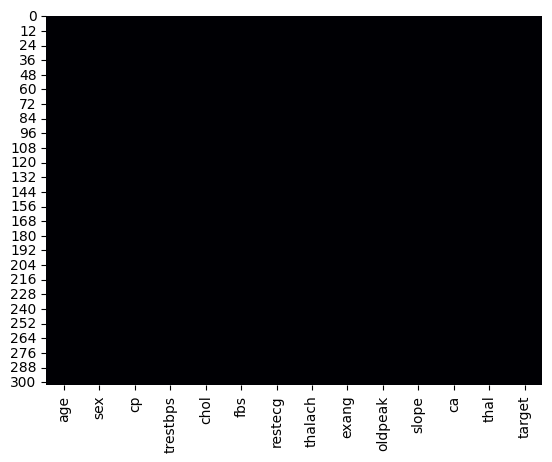

In [8]:
sns.heatmap(df.isnull(), cmap = 'magma', cbar = False)

* No null values present.

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [10]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [11]:
#renaming the column name
df.columns = ['Age', 'Gender', 'ChestPain', 'RestingBloodPressure', 'Cholestrol', 'FastingBloodSugar', 'RestingECG', 'MaxHeartRateAchivied', 'ExerciseIndusedAngina', 
               'Oldpeak', 'Slope', 'Majorvessels', 'Thalassemia', 'Target']
df.columns

Index(['Age', 'Gender', 'ChestPain', 'RestingBloodPressure', 'Cholestrol',
       'FastingBloodSugar', 'RestingECG', 'MaxHeartRateAchivied',
       'ExerciseIndusedAngina', 'Oldpeak', 'Slope', 'Majorvessels',
       'Thalassemia', 'Target'],
      dtype='object')

In [12]:
#checking unique values from each column
df.nunique()

Age                       41
Gender                     2
ChestPain                  4
RestingBloodPressure      49
Cholestrol               152
FastingBloodSugar          2
RestingECG                 3
MaxHeartRateAchivied      91
ExerciseIndusedAngina      2
Oldpeak                   40
Slope                      3
Majorvessels               5
Thalassemia                4
Target                     2
dtype: int64

In [13]:
bg_color = (0.25, 0.25, 0.25)
sns.set(rc={"font.style": "normal", 
            "axes.facecolor": bg_color,
            "figure.facecolor" : bg_color,
            "text.color": "white",
            "xtick.color": "white",
            "ytick.color": "white",
            "axes.labelcolor": "white",
            "axes.grid": False,
            'axes.labelsize': 25,
            'figure.figsize': (10.0,5.0),
            'xtick.labelsize': 15,
            'ytick.labelsize': 15})

<Axes: >

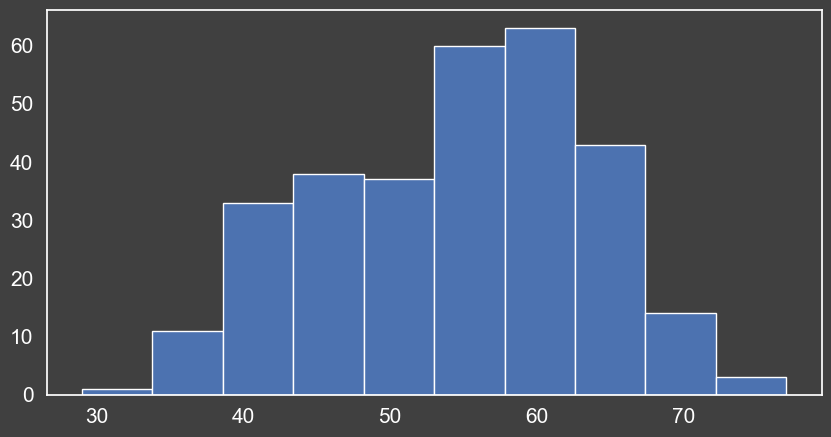

In [14]:
df['Age'].hist(grid = False)

<Axes: >

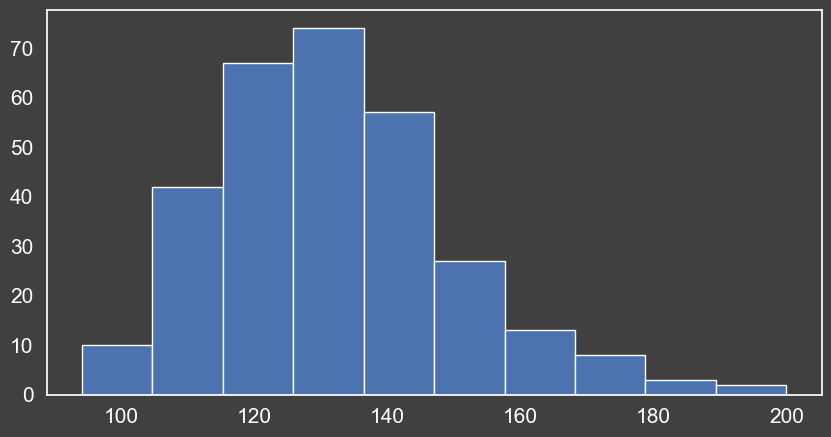

In [15]:
df['RestingBloodPressure'].hist(grid=False)

<Axes: >

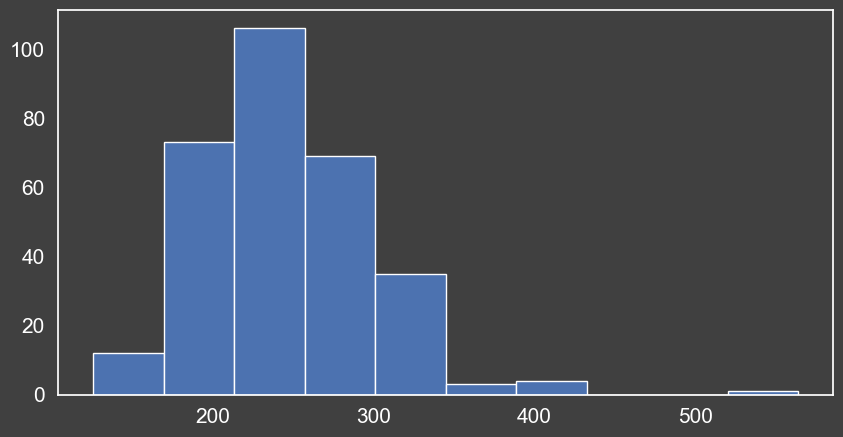

In [16]:
df['Cholestrol'].hist(grid = False)

<Axes: xlabel='ChestPainType', ylabel='Age'>

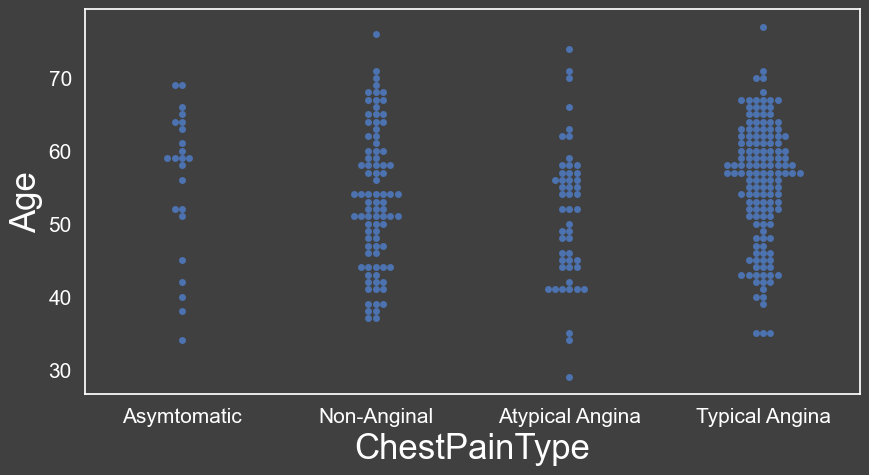

In [20]:
result= []
for i in df['ChestPain']:
    if i == 0:
        result.append('Typical Angina')
    if i == 1:
        result.append('Atypical Angina')
    if i == 2:
        result.append('Non-Anginal')
    if i == 3:
        result.append('Asymtomatic')

df['ChestPainType'] = pd.Series(result)

sns.swarmplot(x= 'ChestPainType', y='Age', data=df)

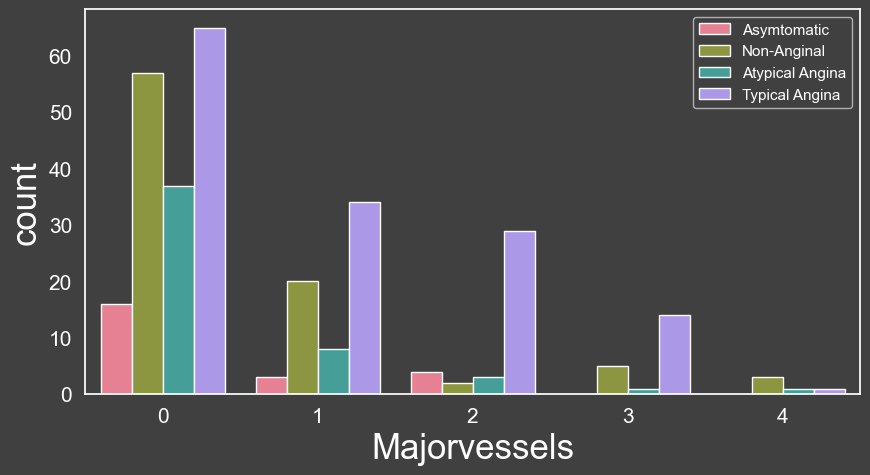

In [21]:
ax = sns.countplot(hue= result, x='Majorvessels', data= df, palette= 'husl')

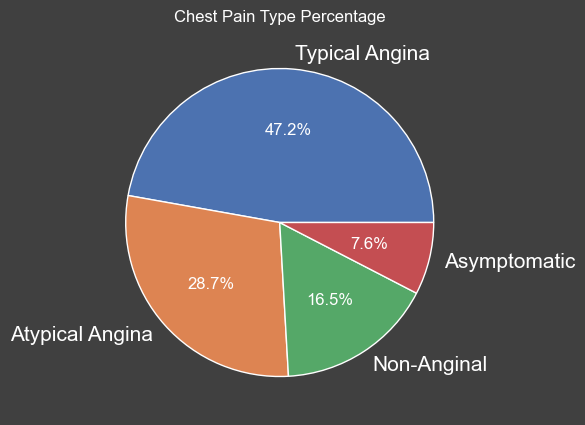

In [22]:
ChestPain = (df['ChestPainType']).value_counts()
percent_typeAng = ChestPain[0] * 100/len(df)
percent_AtypeAng = ChestPain[1] * 100/len(df)
percent_nonAng = ChestPain[2] * 100/len(df)
percent_none = ChestPain[3] * 100/len(df)

values= [percent_typeAng, percent_AtypeAng, percent_nonAng, percent_none]
labels = ['Typical Angina', 'Atypical Angina', 'Non-Anginal', 'Asymptomatic' ]
plt.pie(values, labels= labels, autopct= '%1.1f%%')
plt.title("Chest Pain Type Percentage")
plt.show()

<Axes.ArtistList of 12 patches>


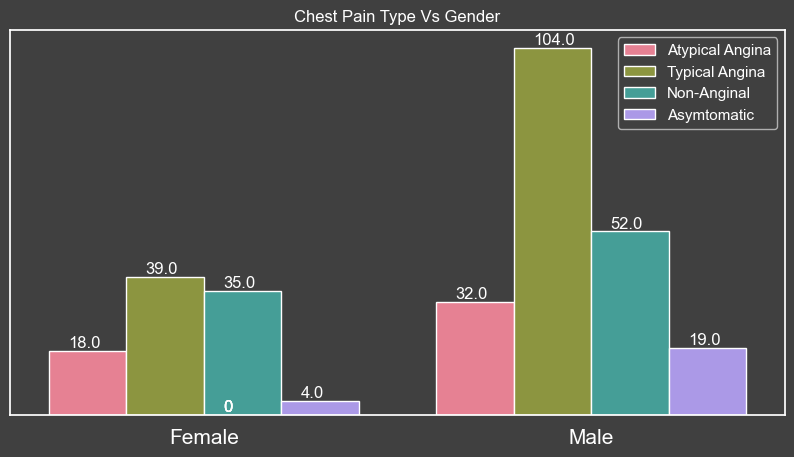

In [23]:
ax = sns.countplot(hue=result, x= 'Gender', data = df, palette = 'husl')

plt.title("Chest Pain Type Vs Gender")
plt.ylabel("")
plt.yticks([])
plt.xlabel("")
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.05, p.get_height()+1))
ax.set_xticklabels(['Female' , 'Male'])
print(ax.patches)

In [24]:
#checking how many classes in the target column
df['Target'].value_counts()

Target
1    165
0    138
Name: count, dtype: int64

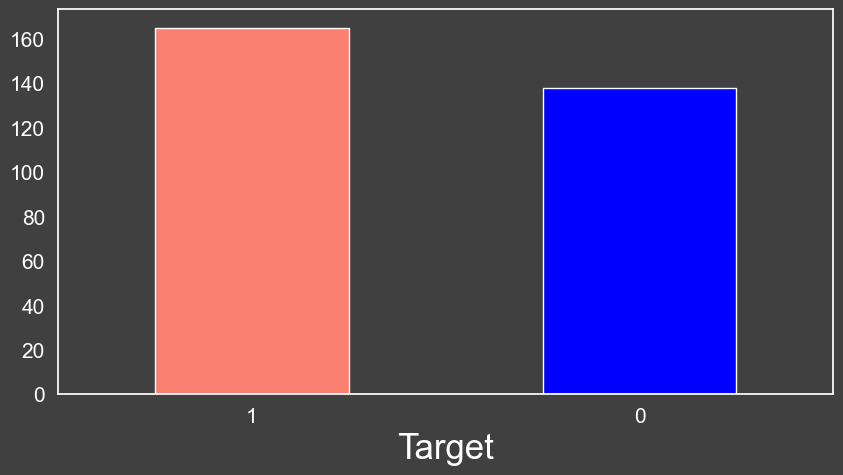

In [27]:
df['Target'].value_counts().plot(kind = 'bar', color = ['salmon', 'blue'])
plt.xticks(rotation =360)
plt.show()

In [28]:
#same with Gender column Gender - (1 = male; 0 = female)
df['Gender'].value_counts()

Gender
1    207
0     96
Name: count, dtype: int64

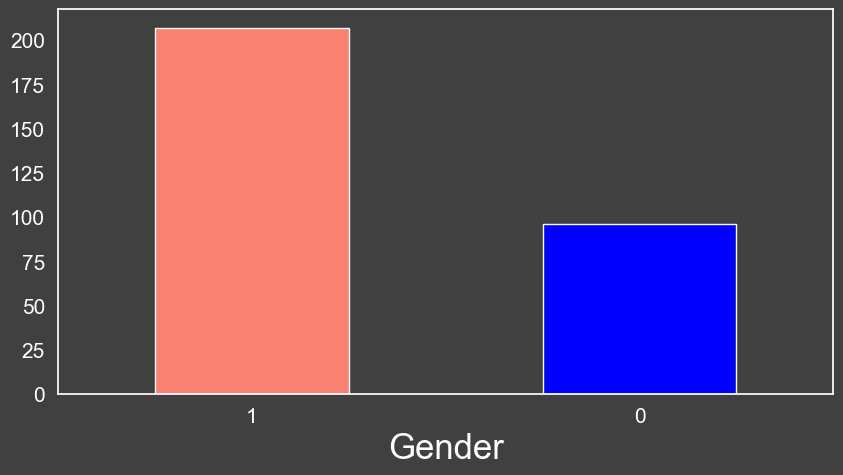

In [31]:
#There is much gap between Male and female values Gender - (1 = male; 0 = female)
df['Gender'].value_counts().plot(kind = 'bar', color= ['salmon','blue'])
plt.xticks(rotation= 360)
plt.show()

In [32]:
# Let's make our correlation matrix a bit prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))

# Plot
ax = sns.heatmap(corr_matrix, 
                 annot=True, 
                 linewidths=0.5, 
                 fmt=".2f", 
                 cmap="YlGnBu", )

# Customization
plt.title("Heatmap Correlation")
plt.show()

ValueError: could not convert string to float: 'Asymtomatic'

In [34]:
df.ChestPainType.value_counts()

ChestPainType
Typical Angina     143
Non-Anginal         87
Atypical Angina     50
Asymtomatic         23
Name: count, dtype: int64

In [35]:
data = df.copy()
data.shape

(303, 15)

In [37]:
df.drop('ChestPainType', axis= 1, inplace = True)
df.shape

(303, 14)

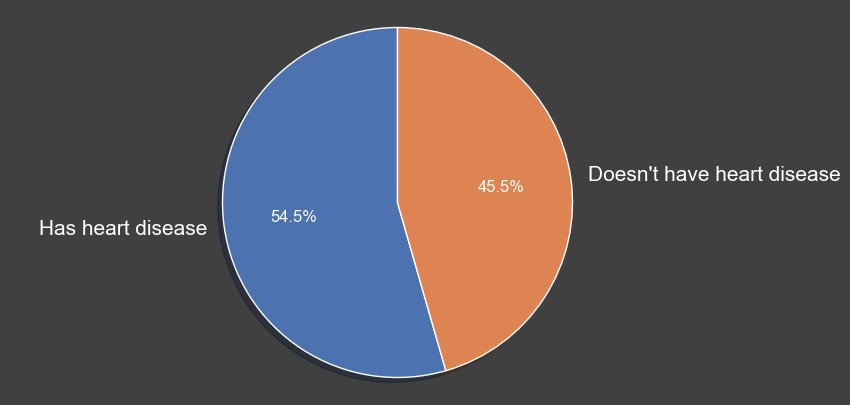

In [39]:
labels = "Has heart disease", "Doesn't have heart disease"
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(df.Target.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [40]:
pd.crosstab(df.Target, df.Gender)

Gender,0,1
Target,,
0,24,114
1,72,93


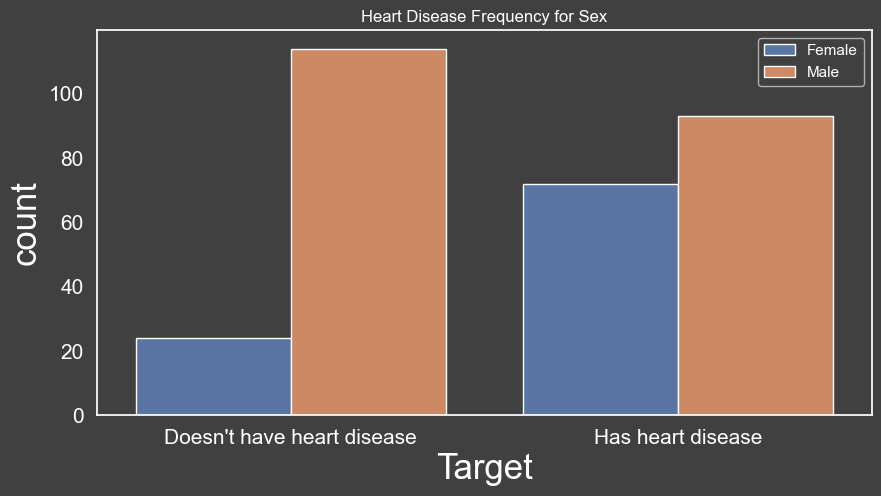

In [41]:
fig = sns.countplot(x = 'Target', data = df, hue = 'Gender')
fig.set_xticklabels(labels=["Doesn't have heart disease", 'Has heart disease'], rotation=0)
plt.legend(['Female', 'Male'])
plt.title("Heart Disease Frequency for Sex");

In [43]:
df.ChestPain.value_counts()

ChestPain
0    143
2     87
1     50
3     23
Name: count, dtype: int64

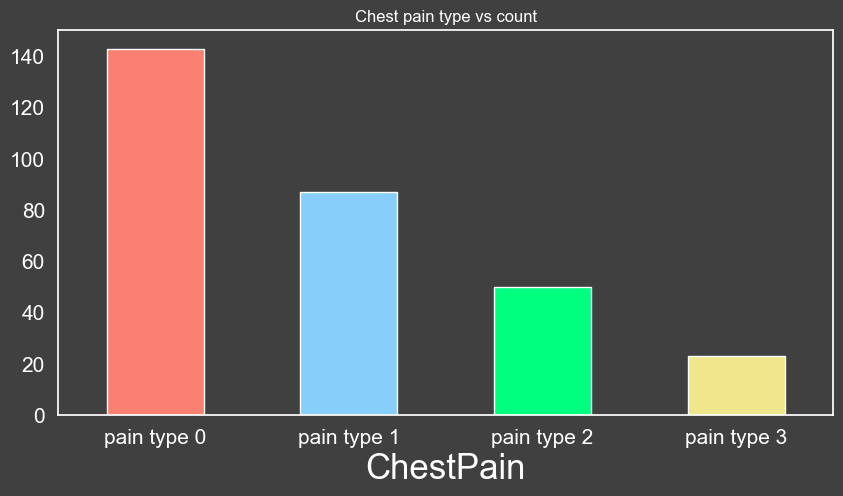

In [44]:
#plotting a bar chart
fig = df.ChestPain.value_counts().plot(kind = 'bar', color = ['salmon', 'lightskyblue', 'springgreen', 'khaki'])
fig.set_xticklabels(labels=['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3'], rotation=0)

plt.title('Chest pain type vs count');

In [45]:
pd.crosstab(df.Gender, df.ChestPain)

ChestPain,0,1,2,3
Gender,,,,
0,39,18,35,4
1,104,32,52,19


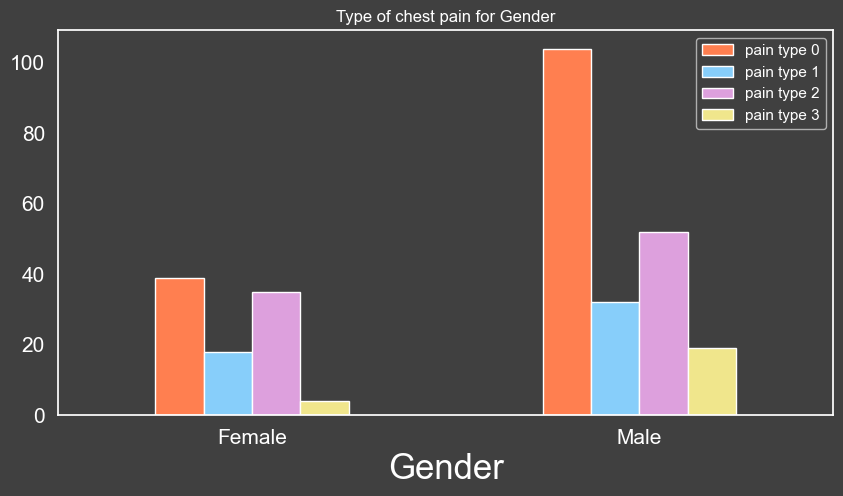

In [46]:
fig = pd.crosstab(df.Gender, df.ChestPain).plot(kind = 'bar', color = ['coral', 'lightskyblue', 'plum', 'khaki'])
plt.title('Type of chest pain for Gender')
fig.set_xticklabels(labels=['Female', 'Male'], rotation=0)
plt.legend(['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3']);

In [47]:
pd.crosstab(df.ChestPain, df.Target)

Target,0,1
ChestPain,,
0,104,39
1,9,41
2,18,69
3,7,16


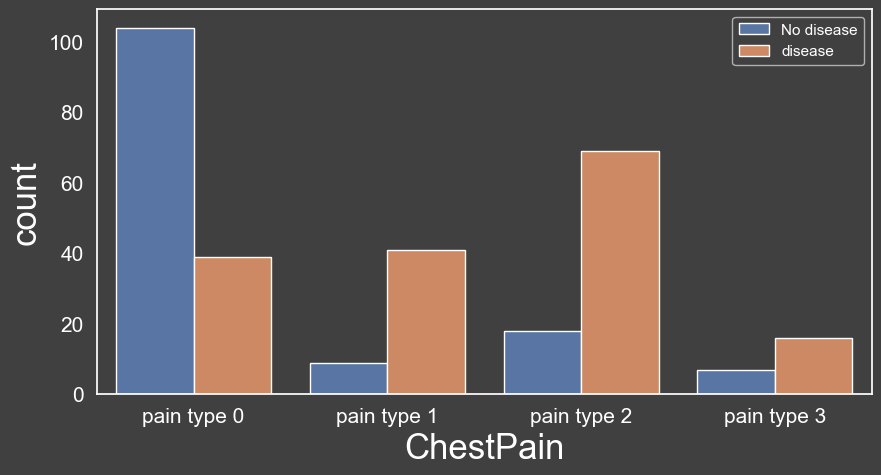

In [48]:
fig = sns.countplot(x = 'ChestPain', data = df, hue = 'Target')
fig.set_xticklabels(labels=['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3'], rotation=0)
plt.legend(['No disease', 'disease']);

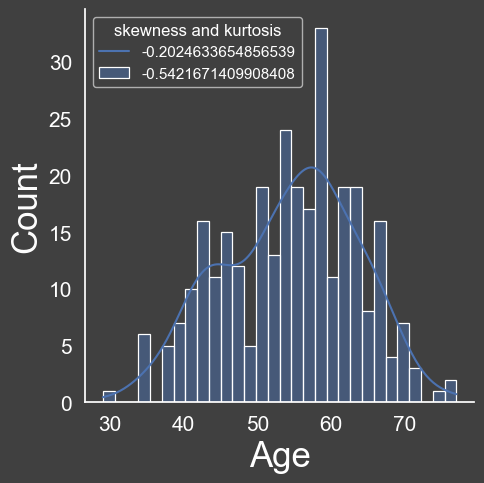

In [49]:
#create a distribution plot with normal distribution curve
sns.displot( x = 'Age', data = df, bins = 30, kde = True)
skewness=str(df["Age"].skew())
kurtosis=str(df["Age"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.show();

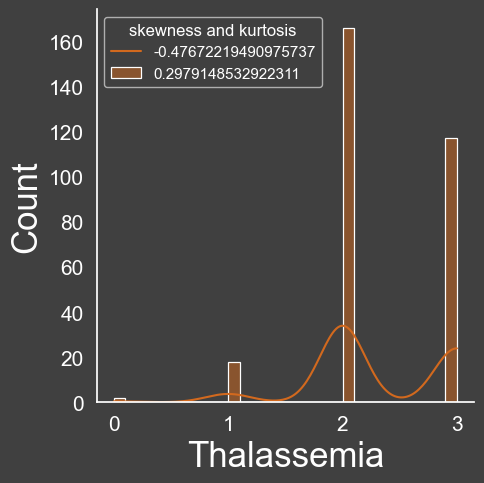

In [51]:
sns.displot(x = 'Thalassemia', data = df, bins = 30, kde = True, color = 'chocolate')
skewness=str(df["Thalassemia"].skew())
kurtosis=str(df["Thalassemia"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.show();

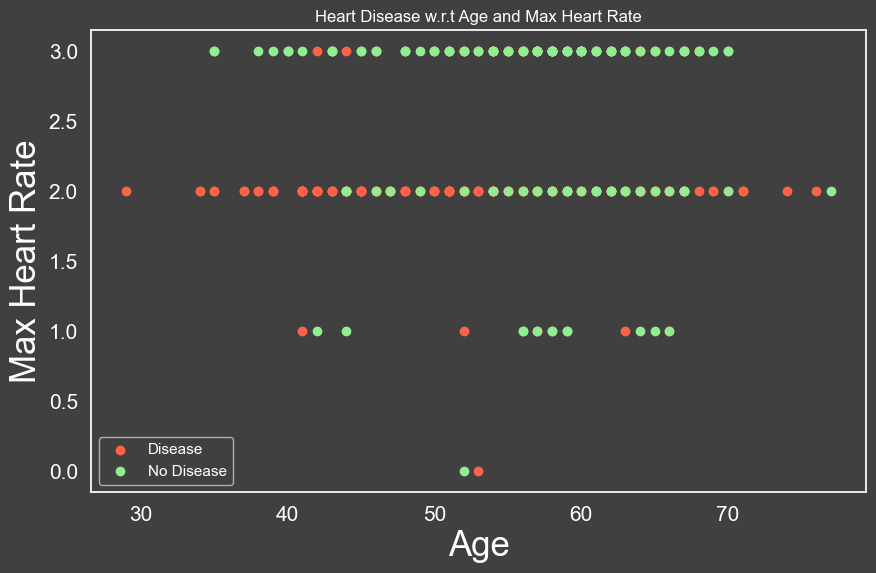

In [53]:
# Creating a figure
plt.figure(figsize=(10,6))

#plotting the values for people who have heart disease
plt.scatter(df.Age[df.Target==1], 
            df.Thalassemia[df.Target==1], 
            c="tomato")

#plotting the values for people who doesn't have heart disease
plt.scatter(df.Age[df.Target==0], 
            df.Thalassemia[df.Target==0], 
            c="lightgreen")

# Addind info
plt.title("Heart Disease w.r.t Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

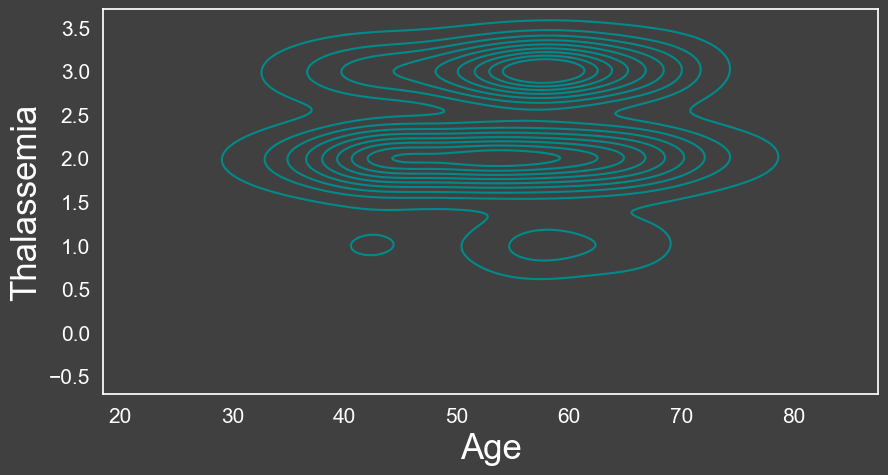

In [54]:
sns.kdeplot(x = 'Age', y = 'Thalassemia', data = df, color = 'darkcyan');

In [55]:
df.columns

Index(['Age', 'Gender', 'ChestPain', 'RestingBloodPressure', 'Cholestrol',
       'FastingBloodSugar', 'RestingECG', 'MaxHeartRateAchivied',
       'ExerciseIndusedAngina', 'Oldpeak', 'Slope', 'Majorvessels',
       'Thalassemia', 'Target'],
      dtype='object')

In [56]:
df.FastingBloodSugar.value_counts()

FastingBloodSugar
0    258
1     45
Name: count, dtype: int64

In [57]:
pd.crosstab(df.FastingBloodSugar, df.Target)

Target,0,1
FastingBloodSugar,,
0,116,142
1,22,23


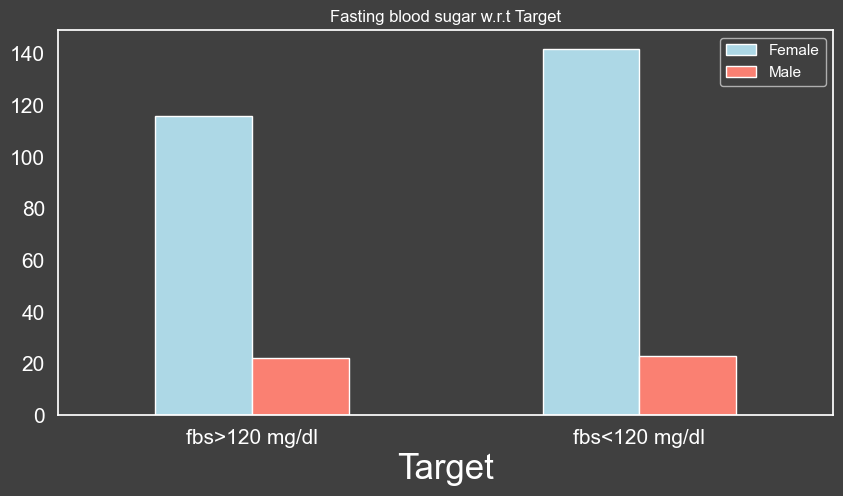

In [60]:
fig = pd.crosstab(df.Target, df.FastingBloodSugar).plot(kind = 'bar', color = ['lightblue', 'salmon'])
plt.title("Fasting blood sugar w.r.t Target")
fig.set_xticklabels(labels=['fbs>120 mg/dl', 'fbs<120 mg/dl'], rotation=0)
plt.legend(['Female', 'Male']);

In [59]:
pd.crosstab(df.FastingBloodSugar, df.Gender)

Gender,0,1
FastingBloodSugar,,
0,84,174
1,12,33


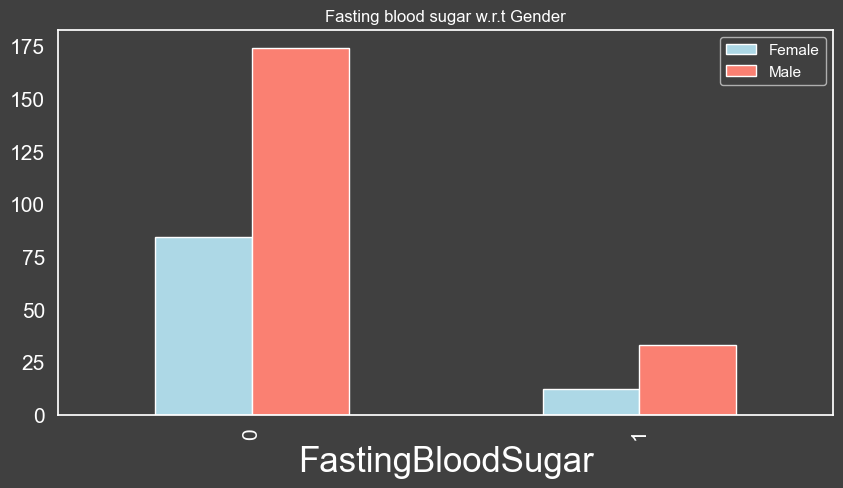

In [64]:
fig = pd.crosstab(df.FastingBloodSugar, df.Gender).plot(kind = 'bar', color = ['lightblue', 'salmon'])
plt.title("Fasting blood sugar w.r.t Gender")
#fig.set_xticklabels(rotation=0)
plt.legend(['Female', 'Male']);

Data PreProcessing

In [65]:
df.isnull().sum()

Age                      0
Gender                   0
ChestPain                0
RestingBloodPressure     0
Cholestrol               0
FastingBloodSugar        0
RestingECG               0
MaxHeartRateAchivied     0
ExerciseIndusedAngina    0
Oldpeak                  0
Slope                    0
Majorvessels             0
Thalassemia              0
Target                   0
dtype: int64

In [66]:
# creating dependent and independent matrix of features
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [67]:
print(x.shape)
print(y.shape)

(303, 13)
(303,)


In [68]:
x.head(5)

,Age,Gender,ChestPain,RestingBloodPressure,Cholestrol,FastingBloodSugar,RestingECG,MaxHeartRateAchivied,ExerciseIndusedAngina,Oldpeak,Slope,Majorvessels,Thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [69]:
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: Target, dtype: int64

In [70]:
#splitting data into x_test, y_test, x_train, y_train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=31)


In [71]:
len(x_train), len(x_test), len(y_train), len(y_test)

(242, 61, 242, 61)

In [72]:
x_train.head()

,Age,Gender,ChestPain,RestingBloodPressure,Cholestrol,FastingBloodSugar,RestingECG,MaxHeartRateAchivied,ExerciseIndusedAngina,Oldpeak,Slope,Majorvessels,Thalassemia
130,54,0,2,160,201,0,1,163,0,0.0,2,1,2
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3
209,59,1,0,140,177,0,1,162,1,0.0,2,1,3
232,55,1,0,160,289,0,0,145,1,0.8,1,1,3
214,56,1,0,125,249,1,0,144,1,1.2,1,1,2


In [73]:
y_train.head()

130    1
95     1
209    0
232    0
214    0
Name: Target, dtype: int64

In [76]:
log_clf = LogisticRegression(max_iter = 1000, random_state = 4)
log_clf.fit(x_train, y_train)
log_score = log_clf.score(x_test, y_test)
log_score

0.8360655737704918

In [77]:

log_grid = {'C': np.logspace(-5, 5),
            'solver': ['liblinear'],
            'max_iter': np.arange(1000, 2000, 100),
            'penalty':['l1', 'l2']
           }

log_gscv = GridSearchCV(LogisticRegression(random_state = 7),
                          param_grid=log_grid,
                          cv=5,
                          verbose=True)

log_gscv.fit(x_train, y_train)
log_tuned_score = log_gscv.score(x_test, y_test)
log_tuned_score

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


0.8852459016393442

In [78]:
log_gscv.best_params_

{'C': 0.1206792640639329,
 'max_iter': 1000,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [79]:

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)
knn_score = knn_clf.score(x_test, y_test)
knn_score

0.639344262295082

In [80]:
knn_grid = {'n_neighbors': np.arange(2, 15),
            'leaf_size': [10, 15, 20, 25, 30, 35, 40, 45, 50],
            'p':[1,2,3,4,5], 
            'algorithm': ['auto', 'ball_tree', 'kd_tree']}

knn_gscv = GridSearchCV(KNeighborsClassifier(),
                        param_grid=knn_grid,
                        cv=5,
                        verbose=True)

knn_gscv.fit(x_train, y_train)
knn_tuned_score = knn_gscv.score(x_test, y_test)
knn_tuned_score

Fitting 5 folds for each of 1755 candidates, totalling 8775 fits


0.6721311475409836

In [81]:
knn_gscv.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 9, 'p': 1}

In [82]:
svc_clf = SVC(random_state = 7)
svc_clf.fit(x_train, y_train)
svc_score = svc_clf.score(x_test, y_test)
svc_score

0.5737704918032787

In [84]:
svc_grid = {'C': np.logspace(-5, 5, 20),
            'kernel': ['rbf'],
            'degree': [2,3,4]
           }

svc_gscv = GridSearchCV(SVC(random_state = 31),
                        param_grid=svc_grid,
                        cv=5,
                        verbose=True)

svc_gscv.fit(x_train, y_train)
svc_tuned_score = log_gscv.score(x_test, y_test)
svc_tuned_score

Fitting 5 folds for each of 60 candidates, totalling 300 fits


0.8852459016393442

In [85]:
svc_gscv.best_params_

{'C': 2636.6508987303555, 'degree': 2, 'kernel': 'rbf'}

In [86]:
rand_clf = RandomForestClassifier(n_estimators=1000, random_state = 35)
rand_clf.fit(x_train, y_train)
ranf_score = rand_clf.score(x_test, y_test)
ranf_score

0.8688524590163934

In [88]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
gbc_score = gbc.score(x_test, y_test)
gbc_score

0.8360655737704918

In [89]:
gbc_grid = {'loss': ['deviance', 'exponential'],
            'learning_rate': [0.1,0.01],
            'n_estimators': [100, 200, 500, 1000],
            'min_samples_split': [2, 4, 6, 8, 10],
            'min_samples_leaf': [1, 2, 3, 5],
            'max_depth': [1, 2, 3]}


gbc_gscv = GridSearchCV(GradientBoostingClassifier(),
                      param_grid = gbc_grid,
                           cv=5,
                           verbose=True)
gbc_gscv.fit(x_train, y_train)
gbc_tuned_score = gbc_gscv.score(x_test, y_test)
gbc_tuned_score

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


KeyboardInterrupt: 

In [90]:
gbc_gscv.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [91]:
from catboost import CatBoostClassifier
cbc = CatBoostClassifier(random_seed = 31)
cbc.fit(x_train, y_train, verbose=False);
cbc_score = cbc.score(x_test, y_test);
cbc_score

0.819672131147541

In [92]:
cbc_grid = {'iterations':[10, 100, 200, 500, 1000],
            'learning_rate': [0.1, 0.01]}


cbc_grcv = GridSearchCV(CatBoostClassifier(random_state = 31),
                      param_grid = cbc_grid,
                           cv=5,
                           verbose=True)

cbc_grcv.fit(x_train, y_train, verbose=False)
cbc_tuned_score = cbc_grcv.score(x_test, y_test)
cbc_tuned_score

Fitting 5 folds for each of 10 candidates, totalling 50 fits


0.819672131147541

In [93]:
cbc_grcv.best_params_

{'iterations': 10, 'learning_rate': 0.1}

In [94]:
# create a dictionary with all scores
score = [{'Model':'Logistic Regression', 'Score': log_score}, 
         {'Model':'SVC', 'Score': svc_score},
         {'Model':'KNN', 'Score': knn_score},
         {'Model':'Gradient Boosting', 'Score': gbc_score},
         {'Model':'CatBoost', 'Score': cbc_score}
         ]

In [95]:
pd.DataFrame(score, columns=['Model','Score'])

,Model,Score
0,Logistic Regression,0.836066
1,SVC,0.573770
2,KNN,0.639344
3,Gradient Boosting,0.836066
4,CatBoost,0.819672


In [100]:

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc_score = gbc.score(x_test, y_test)
rfc_score

0.8360655737704918